# 정렬

데이터를 일정한 순서대로 나열하는 것을 정렬이라 한다.

* dataframe 정렬: sort_values()
* list 정렬: list.sort(), sorted(list)
* tuple 정렬: sorted(tuple, 키)

시간복잡도
* 선택, 버블, 삽입 정렬 등 (O(n^2))
* 퀵, 병합, 힙 정렬 등 (O(nlogn))
* 계수 정렬(O(m+n))
자료에 따라 최적의 정렬 방식이 다르다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.DataFrame({"s": [1, 3, 2],
             "name": ["choi", "kim", "lee"],
             "age": [30, 20, 40]})
df

,s,name,age
0,1,choi,30
1,3,kim,20
2,2,lee,40


In [8]:
df.sort_values()    # 에러 난다 - 기준이 되는 열을 지정하지 않음

TypeError: sort_values() missing 1 required positional argument: 'by'

In [9]:
df.sort_values(by="s")

,s,name,age
0,1,choi,30
2,2,lee,40
1,3,kim,20


In [10]:
df.sort_values(by="s", ascending=False)    # 내림차순 정렬

,s,name,age
1,3,kim,20
2,2,lee,40
0,1,choi,30


In [15]:
df.sort_values(by="s", ascending=False, kind="quicksort")    # kind: 어떤 종류의 정렬을 사용할거냐

,s,name,age
1,3,kim,20
2,2,lee,40
0,1,choi,30


In [16]:
df

,s,name,age
0,1,choi,30
1,3,kim,20
2,2,lee,40


In [18]:
df.sort_values(by="s", ascending=False, kind="quicksort", inplace=True)    # inplace: 데이터프레임을 정렬 후 저장할껀지

In [19]:
df

,s,name,age
1,3,kim,20
2,2,lee,40
0,1,choi,30


In [20]:
tp = [(1, "park", 30),
     (3, "lee", 20),
     (2, "choi", 40)]
tp

[(1, 'park', 30), (3, 'lee', 20), (2, 'choi', 40)]

In [22]:
sorted(tp, key=lambda la:la[0])    # 튜플의 경우 람다 함수와 함께 사용한다    # 0번째 인자를 기준으로 정렬

[(1, 'park', 30), (2, 'choi', 40), (3, 'lee', 20)]

In [23]:
sorted(tp, key=lambda la:la[1])

[(2, 'choi', 40), (3, 'lee', 20), (1, 'park', 30)]

In [24]:
mylist = [0, 9, 7, 2, 4]
sorted(mylist)

[0, 2, 4, 7, 9]

In [25]:
mylist.sort()
mylist

[0, 2, 4, 7, 9]

# 데이터프레임과 시리즈 함수 비교

데이터프레임
* 행 개수 세기: len(df), df.shape[0], len(df.index)
* 열 개수 세기: df.shape[1], len(df.columns)
* NULL이 아닌 행 개수 셀 때: df.count()
* 그룹 단위 행 개수 셀 때: df.groupby().size()
* NULL이 아닌 그룹 단위 행 개수 셀 때: df.groupby().count()

시리즈
* 행 개수 세기: len(s), s.size, len(s.index)
* 열 개수 세기: 없음 (당연히 한개--시리즈가 열 벡터이므로)
* NULL이 아닌 행 개수 셀 때: s.count()
* 그룹 단위 행 개수 셀 때: s.groupby().size()
* NULL이 아닌 그룹 단위 행 개수 셀 때: s.groupby().count()

In [26]:
df = pd.DataFrame({'grp': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'], 
                           'val': [1, 2, np.nan, 4, np.nan, np.nan, 7, 8, 9]})
s = pd.Series([1, 2, np.nan, 4, np.nan, np.nan, 7, 8, 9])

In [27]:
df

,grp,val
0,A,1.0
1,A,2.0
2,A,NaN
3,B,4.0
4,B,NaN
5,B,NaN
6,C,7.0
7,C,8.0
8,C,9.0


In [28]:
s

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
5    NaN
6    7.0
7    8.0
8    9.0
dtype: float64

In [29]:
# df의 행의 개수
len(df)

9

In [30]:
df.shape[0]

9

In [32]:
len(df.index)

9

In [33]:
# series의 행의 개수
len(s)

9

In [35]:
s.size

9

In [36]:
len(s.index)

9

In [37]:
# df의 열의 개수
df.shape[1]

2

In [38]:
len(df.columns)

2

In [39]:
# null이 아닌 행의 개수
df.count()

grp    9
val    6
dtype: int64

In [40]:
df["val"].count()

6

In [41]:
s.count()

6

In [42]:
df.groupby("grp").size()    # NaN 포함한 각 그룹의 행 개수

grp
A    3
B    3
C    3
dtype: int64

In [43]:
df.groupby("grp").count()    # NaN을 제외한 각 그룹의 행 개수

,val
grp,
A,2
B,1
C,3


In [44]:
s.groupby(df.grp).size()

grp
A    3
B    3
C    3
dtype: int64

In [45]:
s.groupby(df.grp).count()

grp
A    2
B    1
C    3
dtype: int64

# 문자열 처리

In [46]:
df = pd.DataFrame({'id': ['A_001', 'A_002', 'A_003', 'B_001', 'C_001', 'C_002'], 
                          'val': np.arange(6)})

In [47]:
df

,id,val
0,A_001,0
1,A_002,1
2,A_003,2
3,B_001,3
4,C_001,4
5,C_002,5


In [48]:
df.id

0    A_001
1    A_002
2    A_003
3    B_001
4    C_001
5    C_002
Name: id, dtype: object

In [49]:
df.id.split("_")    # 에러가 나온다 -- split은 문자열에서 제공하는 함수이기 때문에 dtype이 안맞는다

AttributeError: 'Series' object has no attribute 'split'

In [50]:
df.id.str.split("_")    # str: 문자로 바꿔준다

0    [A, 001]
1    [A, 002]
2    [A, 003]
3    [B, 001]
4    [C, 001]
5    [C, 002]
Name: id, dtype: object

In [51]:
df.id.str.split("_")[0]    # 0번 인덱스의 행 데이터가 추출됨

['A', '001']

In [53]:
df.id.str.split("_").str[0]    # 각 행의 0번째 인자들 추출    # 문법적으로 이렇게 정의되어 있으므로 이렇게 외워라

0    A
1    A
2    A
3    B
4    C
5    C
Name: id, dtype: object

In [56]:
type(df.id.str.split("_").str[0])

pandas.core.series.Series

In [57]:
# 시리즈 데이터를 리스트로 변환하고 싶다
df.id.str.split("_").str[0].tolist()    # tolist(): 시리즈 객체를 리스트로 변환

['A', 'A', 'A', 'B', 'C', 'C']

In [61]:
for i in range(df.shape[0]):    # 행의 개수가 range함수에 들어간다 -- 행의 수 만큼 반복
    print(df.loc[i])

id     A_001
val        0
Name: 0, dtype: object
id     A_002
val        1
Name: 1, dtype: object
id     A_003
val        2
Name: 2, dtype: object
id     B_001
val        3
Name: 3, dtype: object
id     C_001
val        4
Name: 4, dtype: object
id     C_002
val        5
Name: 5, dtype: object


In [62]:
for i in range(df.shape[0]):
    print(df.loc[i, "val"])    # 출력 결과에 val만 나오면 좋겠다

0
1
2
3
4
5


In [63]:
for i in range(df.shape[0]):
    print(df.loc[i, "id"].split("_"))

['A', '001']
['A', '002']
['A', '003']
['B', '001']
['C', '001']
['C', '002']


In [66]:
for i in range(df.shape[0]):
    df.loc[i, "gg"] = df.loc[i, "id"].split("_")[0]
df

,id,val,gg
0,A_001,0,A
1,A_002,1,A
2,A_003,2,A
3,B_001,3,B
4,C_001,4,C
5,C_002,5,C


# 참조

In [68]:
s = pd.Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [72]:
s[2]
s[2:]
s[:3]

0    10
1    20
2    30
dtype: int64

In [73]:
s[s>=s.mean()]

2    30
3    40
4    50
dtype: int64

In [74]:
s[[1, 3]]

1    20
3    40
dtype: int64

In [75]:
s.ix[2]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


30

In [77]:
s = pd.Series([10, 20, 30, 40, 50], index=["a", "b", "c", "d", "e"])
s.ix["c"]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


30

In [78]:
s.get(["a", "c"])

a    10
c    30
dtype: int64

In [80]:
s["b"]=200
s

a     10
b    200
c     30
d     40
e     50
dtype: int64

In [81]:
# d 인덱스 존재여부를 확인하고 싶다
"d" in s

True

# assign함수

예:  df.assign(newc=df["c1"]*df["c2"])

In [82]:
df = pd.DataFrame({
    "c1": [1, 3],
    "c2": [2, 4]
})
df

,c1,c2
0,1,2
1,3,4


In [84]:
df = df.assign(c3=df["c1"]*df["c2"])
df

,c1,c2,c3
0,1,2,2
1,3,4,12


# Dataframe에서 column을 삭제할 때

* del df[열이름]
* df.drop([열이름], axis=1)

In [86]:
df.drop(["c3"], 1)    # 해당 컬럼이 제거는 되지만 데이터프레임 자체에 변화가 저장되지는 않는다

,c1,c2
0,1,2
1,3,4


In [87]:
del df["c3"]    # drop과 달리 변화가 바로 저장된다
df

,c1,c2
0,1,2
1,3,4


In [88]:
df["c1"]
df.c1
df.loc[0]

c1    1
c2    2
Name: 0, dtype: int64

# 텍스트를 단어로 분리 후, 단어 단위로 원핫 인코딩 하기

In [91]:
file_opened = open("190708/python_wikipedia.txt")
file_opened

<_io.TextIOWrapper name='190708/python_wikipedia.txt' mode='r' encoding='cp949'>

In [92]:
file_opened.readlines()

['Python programming language, from wikipedia\n',
 "Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aims to help programmers write clear, logical code for small and large-scale projects.[26]\n",
 'Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including procedural, object-oriented, and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library.[27]\n',
 'Python was conceived in the late 1980s as a successor to the ABC language. Python 2.0, released 2000, introduced features like list comprehensions and a garbage collection system capable of collecting reference cycles. Python 3.0, released 2008, was a major revision of the language that

In [97]:
for line in file_opened.readlines():
    print(line)

In [96]:
# 전처리 (소문자로 통일, stopword 제거, punctuation 제거, 숫자 제거)
def word_preprocess(word):
    word = word.lower()    # 소문자 처리
    stop_words = ['a', 'an', 'the', 'in', 'with', 'to', 'for', 'from', 'of', 'at', 'on', 'until', 'by', 'and', 'but', 'is', 'are', 'was', 'were', 'it', 'that', 'this', 'my', 'his', 'her', 'our', 'as', 'not'] # make your own list
    symbols = [',', '.', ':', '-', '+', '/', '*', '&', '%', '[', ']', '(', ')'] # make your own list
    for stop_word in stop_words:
        if word != stop_word:
            word = word
        else:
            word = ""
    for symbol in symbols:
        word = word.replace(symbol, "")
    return word

In [101]:
file_opened = open("190708/python_wikipedia.txt")
file_opened
for line in file_opened.readlines():
    # 문장 앞뒤 공백 제거
    line = line.strip()
    # 단어 단위로 나누기
    for word in line.split():    # split은 옵션 없으면 기본은 띄어쓰기 단위로 자름
        word = word_preprocess(word)
        print(word)

python
programming
language

wikipedia
python


interpreted
highlevel
generalpurpose
programming
language
created

guido
van
rossum

first
released

1991
python's
design
philosophy
emphasizes
code
readability

its
notable
use

significant
whitespace
its
language
constructs

objectoriented
approach
aims

help
programmers
write
clear
logical
code

small

largescale
projects26
python

dynamically
typed

garbagecollected

supports
multiple
programming
paradigms
including
procedural
objectoriented

functional
programming
python

often
described


"batteries
included"
language
due

its
comprehensive
standard
library27
python

conceived


late
1980s


successor


abc
language
python
20
released
2000
introduced
features
like
list
comprehensions


garbage
collection
system
capable

collecting
reference
cycles
python
30
released
2008


major
revision


language



completely
backwardcompatible

much
python
2
code
does

run
unmodified

python
3
due

concern
about

amount

code
written

python
2
s

In [102]:
# {단어: 갯수} 식으로 각 단어별로 몇개씩 존재하는지 딕셔너리를 구성하고 싶다
token_index={}

file_opened = open("190708/python_wikipedia.txt")
file_opened
for line in file_opened.readlines():
    # 문장 앞뒤 공백 제거
    line = line.strip()
    # 단어 단위로 나누기
    for word in line.split():    # split은 옵션 없으면 기본은 띄어쓰기 단위로 자름
        word = word_preprocess(word)
        # 딕셔너리 구성
        if word not in token_index:    # word가 token 딕셔너리에 없다면
            if word != "":    # word가 공백이 아니라 순수한 단어라면
                token_index[word] = 1
        else:
            token_index[word] += 1
print(token_index)

{'python': 14, 'programming': 4, 'language': 7, 'wikipedia': 1, 'interpreted': 1, 'highlevel': 1, 'generalpurpose': 1, 'created': 1, 'guido': 2, 'van': 2, 'rossum': 2, 'first': 1, 'released': 3, '1991': 1, "python's": 1, 'design': 1, 'philosophy': 1, 'emphasizes': 1, 'code': 4, 'readability': 1, 'its': 3, 'notable': 1, 'use': 1, 'significant': 1, 'whitespace': 1, 'constructs': 1, 'objectoriented': 2, 'approach': 1, 'aims': 1, 'help': 1, 'programmers': 2, 'write': 1, 'clear': 1, 'logical': 1, 'small': 1, 'largescale': 1, 'projects26': 1, 'dynamically': 1, 'typed': 1, 'garbagecollected': 1, 'supports': 1, 'multiple': 1, 'paradigms': 1, 'including': 1, 'procedural': 1, 'functional': 1, 'often': 1, 'described': 1, '"batteries': 1, 'included"': 1, 'due': 2, 'comprehensive': 1, 'standard': 1, 'library27': 1, 'conceived': 1, 'late': 1, '1980s': 1, 'successor': 1, 'abc': 1, '20': 1, '2000': 1, 'introduced': 1, 'features': 1, 'like': 1, 'list': 1, 'comprehensions': 1, 'garbage': 1, 'collection'

# 표본 추출

In [104]:
np.random.normal(5, size=3)   # 정규분포로부터 난수 3개 생성

array([4.35176958, 5.17210619, 4.3493008 ])

In [105]:
np.random.seed(708)
np.random.normal(size=10)

array([-0.44701866,  0.42271748,  0.35076078, -0.15413394, -1.5020158 ,
        1.30307833,  1.00748836,  0.06666045, -1.47430939, -0.39288867])

## binomial: 이항분포로부터 무작위 표본 추출

이산형/연속형 확률 분포
* 이산형(이항, 포아송)
* 연속형(정규, t, 균등, f, 카이제곱 등)

성공(1), 실패(0) --> 베르누이 시행

성공 확률을 p, 베르누이 시행을 n번 수행, 성공하는 횟수를 x라 하면, "확률변수 X는 모수 n과 p인 이항분포를 따른다" 라고 표현

f(x) = (nCx)(p^x)((1-p)^(n-x)),     x = 0, 1, ..., n

In [106]:
np.random.binomial(n=1, p=0.5, size=20)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [108]:
sum(np.random.binomial(n=1, p=0.5, size=20)==1)/20

0.45

In [109]:
# np.random.normal(mu, sigma, size)    # mu: 평균, sigma: 표준편차
np.random.normal(0, 3, 100)

array([ 1.5370588 ,  2.39292138,  3.3512172 , -4.2842833 , -4.55406869,
        4.24234311,  1.30057018,  0.895461  , -0.43727831, -0.14655071,
       -0.56577133, -2.33287759,  2.6771022 , -3.47648854, -0.09214297,
        3.32509782, -0.63574142,  0.18675766, -1.87080797, -1.21456478,
       -0.43458814, -1.25167771, -2.20515387, -2.44936339,  3.98588931,
        3.54156261, -2.49184564, -2.00578431,  3.46666957,  1.75534793,
       -1.85587612,  4.11226051, -1.82249905,  5.08921616, -2.6942552 ,
       -4.24375425,  7.36352146,  0.28220585, -0.27808825,  4.23707537,
        1.80913906, -4.06653688, -0.92869466,  3.34404997,  2.04035521,
        0.10898017,  0.98188226, -1.48505134,  1.14984669, -3.656114  ,
        2.22571485, -1.75208816, -0.99799926,  0.7927612 ,  2.83020632,
       -3.17093664, -0.63203011, -5.48890198,  2.8050894 , -3.95254499,
       -0.53223889,  2.17131378,  0.20490759, -4.58187782, -1.97621464,
        2.21116709, -1.9702217 ,  0.02622525, -1.37888258, -0.95

# 데이터 병합과 결측값 처리

In [110]:
visited = pd.read_csv("data/survey_visited.csv")
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [111]:
survey = pd.read_csv("data/survey_survey.csv")
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


두 데이터를 merge하려고 한다

In [112]:
visited.merge(survey)    # 에러가 난다. 공통적으로 존재하는 column이 없기 때문에.

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

visited 의 ident와 survey의 taken이 같은 속성이라고 가정하고 합친다

In [113]:
vs = visited.merge(survey, left_on="ident", right_on="taken")
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


merge를 할 때 NaN이 있을 경우 어떻게 처리할지를 고민해야 한다

In [115]:
from numpy import NaN, NAN, nan
num_legs = pd.Series({
    "goat": 4,
    "amoeba": nan
})
num_legs

goat      4.0
amoeba    NaN
dtype: float64

In [116]:
gapminder = pd.read_csv("data/gapminder.tsv", sep="\t")
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [117]:
life_exp = gapminder.groupby(["year"])["lifeExp"].mean()
life_exp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [118]:
life_exp.loc[range(2000,2010), ]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


year
2000          NaN
2001          NaN
2002    65.694923
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007    67.007423
2008          NaN
2009          NaN
Name: lifeExp, dtype: float64

In [120]:
life_exp[life_exp.index>2000]

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [121]:
ebola = pd.read_csv("data/country_timeseries.csv")
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


In [122]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [123]:
ebola.count()

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [124]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [125]:
num_missing = ebola.shape[0] - ebola.count()    # 누락된 데이터 개수
num_missing

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [126]:
ebola.isnull()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
1,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
2,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
3,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True
4,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
5,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
6,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
7,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,True,True
8,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
9,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True


In [127]:
ebola["Cases_Guinea"].isnull()

0      False
1      False
2      False
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12      True
13     False
14      True
15     False
16      True
17     False
18      True
19     False
20     False
21      True
22     False
23      True
24     False
25      True
26      True
27     False
28     False
29      True
       ...  
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100     True
101    False
102     True
103     True
104    False
105    False
106    False
107     True
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
Name: Cases_Guinea, Length: 122, dtype: bool

In [128]:
np.count_nonzero(ebola["Cases_Guinea"].isnull())    # count_nonzero: 0이 아닌 것들, 즉, True의 개수    # 여기서는 isnull이 True인 갯수이므로 null의 갯수

29

In [130]:
ebola.Cases_Guinea.value_counts()    # 각 발병자수가 있었던 적이 며칠 있었는지

86.0      3
112.0     2
390.0     2
495.0     2
2597.0    1
510.0     1
812.0     1
771.0     1
648.0     1
607.0     1
579.0     1
543.0     1
519.0     1
2769.0    1
506.0     1
899.0     1
485.0     1
2571.0    1
472.0     1
460.0     1
427.0     1
415.0     1
861.0     1
942.0     1
936.0     1
1906.0    1
2416.0    1
2706.0    1
2292.0    1
2164.0    1
         ..
151.0     1
1199.0    1
143.0     1
1157.0    1
127.0     1
122.0     1
103.0     1
49.0      1
2730.0    1
203.0     1
208.0     1
218.0     1
408.0     1
412.0     1
413.0     1
398.0     1
351.0     1
344.0     1
328.0     1
291.0     1
281.0     1
258.0     1
248.0     1
233.0     1
236.0     1
235.0     1
231.0     1
226.0     1
224.0     1
2776.0    1
Name: Cases_Guinea, Length: 88, dtype: int64

In [131]:
ebola.Cases_Guinea.value_counts(dropna=False)    # NaN의 개수도 나오므로 NaN이 몇개 있는지 확인할 수 있다

NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
506.0      1
812.0      1
771.0      1
648.0      1
607.0      1
579.0      1
543.0      1
519.0      1
510.0      1
2597.0     1
2769.0     1
899.0      1
2571.0     1
485.0      1
472.0      1
460.0      1
427.0      1
415.0      1
861.0      1
942.0      1
936.0      1
1667.0     1
2706.0     1
2416.0     1
2292.0     1
          ..
1519.0     1
151.0      1
1199.0     1
143.0      1
127.0      1
122.0      1
103.0      1
49.0       1
2695.0     1
2730.0     1
208.0      1
218.0      1
408.0      1
412.0      1
413.0      1
398.0      1
351.0      1
344.0      1
328.0      1
291.0      1
281.0      1
258.0      1
248.0      1
233.0      1
236.0      1
235.0      1
231.0      1
226.0      1
224.0      1
2776.0     1
Name: Cases_Guinea, Length: 89, dtype: int64

In [132]:
ebola.fillna(0)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0
5,12/28/2014,281,2706.0,8018.0,9446.0,0.0,0.0,0.0,0.0,0.0,1708.0,3423.0,2758.0,0.0,0.0,0.0,0.0,0.0
6,12/27/2014,280,2695.0,0.0,9409.0,0.0,0.0,0.0,0.0,0.0,1697.0,0.0,2732.0,0.0,0.0,0.0,0.0,0.0
7,12/24/2014,277,2630.0,7977.0,9203.0,0.0,0.0,0.0,0.0,0.0,0.0,3413.0,2655.0,0.0,0.0,0.0,0.0,0.0
8,12/21/2014,273,2597.0,0.0,9004.0,0.0,0.0,0.0,0.0,0.0,1607.0,0.0,2582.0,0.0,0.0,0.0,0.0,0.0
9,12/20/2014,272,2571.0,7862.0,8939.0,0.0,0.0,0.0,0.0,0.0,1586.0,3384.0,2556.0,0.0,0.0,0.0,0.0,0.0


In [134]:
ebola.fillna(0).iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [135]:
ebola.fillna(method="ffill")

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,8018.0,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,3423.0,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,1697.0,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,7977.0,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,3413.0,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


## 누락값 제거

In [136]:
ebola.shape

(122, 18)

In [137]:
ebola_dropna = ebola.dropna()
ebola_dropna    # 이렇게 무작정 제거하면 안된다 -- 남는게 없다

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [138]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [140]:
ebola["Cases_multiple"] = ebola["Cases_Guinea"] + ebola["Cases_Liberia"] + ebola["Cases_SierraLeone"]
ebola_subset = ebola.loc[:, ["Cases_Guinea", "Cases_Liberia", "Cases_SierraLeone", "Cases_multiple"]]
ebola_subset

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_multiple
0,2776.0,NaN,10030.0,NaN
1,2775.0,NaN,9780.0,NaN
2,2769.0,8166.0,9722.0,20657.0
3,NaN,8157.0,NaN,NaN
4,2730.0,8115.0,9633.0,20478.0
5,2706.0,8018.0,9446.0,20170.0
6,2695.0,NaN,9409.0,NaN
7,2630.0,7977.0,9203.0,19810.0
8,2597.0,NaN,9004.0,NaN
9,2571.0,7862.0,8939.0,19372.0


* 연산에 NaN이 있으면 결과로 NaN이 출력된다

In [141]:
ebola.Cases_Guinea.sum(skipna=True)

84729.0

In [142]:
ebola.Cases_Guinea.sum(skipna=False)

nan

# melt

In [143]:
pew = pd.read_csv("data/pew.csv")
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [144]:
pew.iloc[:, 0:6]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k
0,Agnostic,27,34,60,81,76
1,Atheist,12,27,37,52,35
2,Buddhist,27,21,30,34,33
3,Catholic,418,617,732,670,638
4,Don’t know/refused,15,14,15,11,10
5,Evangelical Prot,575,869,1064,982,881
6,Hindu,1,9,7,9,11
7,Historically Black Prot,228,244,236,238,197
8,Jehovah's Witness,20,27,24,24,21
9,Jewish,19,19,25,25,30


In [145]:
pd.melt(pew)    # 각각의 컬럼들이 행으로 늘어져있는 모습이 된다

,variable,value
0,religion,Agnostic
1,religion,Atheist
2,religion,Buddhist
3,religion,Catholic
4,religion,Don’t know/refused
5,religion,Evangelical Prot
6,religion,Hindu
7,religion,Historically Black Prot
8,religion,Jehovah's Witness
9,religion,Jewish


In [146]:
pd.melt(pew, id_vars="religion")    # religion이라는 컬럼을 기준으로 피봇한 상태

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [148]:
pew_long = pd.melt(pew, id_vars="religion", var_name="income", value_name="count")
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [150]:
billboard = pd.read_csv("data/billboard.csv")
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,51,39.0,34.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,97,97.0,96.0,95.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,84,62.0,51.0,41.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Aaliyah,Try Again,4:03,2000-03-18,59,53.0,38.0,28.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,76,76.0,74.0,69.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
year            317 non-null int64
artist          317 non-null object
track           317 non-null object
time            317 non-null object
date.entered    317 non-null object
wk1             317 non-null int64
wk2             312 non-null float64
wk3             307 non-null float64
wk4             300 non-null float64
wk5             292 non-null float64
wk6             280 non-null float64
wk7             269 non-null float64
wk8             260 non-null float64
wk9             253 non-null float64
wk10            244 non-null float64
wk11            236 non-null float64
wk12            222 non-null float64
wk13            210 non-null float64
wk14            204 non-null float64
wk15            197 non-null float64
wk16            182 non-null float64
wk17            177 non-null float64
wk18            166 non-null float64
wk19            156 non-null float64
wk20           

In [152]:
billboard.iloc[0:5, 0:16]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,94.0,99.0,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,51.0,51.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,65.0,55.0,59.0,62.0,61.0,61.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,31.0,36.0,49.0,53.0,57.0,64.0


In [153]:
pd.melt(billboard)

,variable,value
0,year,2000
1,year,2000
2,year,2000
3,year,2000
4,year,2000
5,year,2000
6,year,2000
7,year,2000
8,year,2000
9,year,2000


In [156]:
pd.melt(billboard, id_vars=["year", "artist", "track", "time", "date.entered"], var_name="week", value_name="rating")

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


In [157]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali', 'Cases_multiple'],
      dtype='object')

In [159]:
ebola.iloc[:5, [0, 1, 2, 3, 10, 11]]

,Date,Day,Cases_Guinea,Cases_Liberia,Deaths_Guinea,Deaths_Liberia
0,1/5/2015,289,2776.0,NaN,1786.0,NaN
1,1/4/2015,288,2775.0,NaN,1781.0,NaN
2,1/3/2015,287,2769.0,8166.0,1767.0,3496.0
3,1/2/2015,286,NaN,8157.0,NaN,3496.0
4,12/31/2014,284,2730.0,8115.0,1739.0,3471.0


In [161]:
ebola_long = pd.melt(ebola, id_vars=["Date", "Day"])
ebola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
5,12/28/2014,281,Cases_Guinea,2706.0
6,12/27/2014,280,Cases_Guinea,2695.0
7,12/24/2014,277,Cases_Guinea,2630.0
8,12/21/2014,273,Cases_Guinea,2597.0
9,12/20/2014,272,Cases_Guinea,2571.0


In [162]:
ebola_long.variable

0         Cases_Guinea
1         Cases_Guinea
2         Cases_Guinea
3         Cases_Guinea
4         Cases_Guinea
5         Cases_Guinea
6         Cases_Guinea
7         Cases_Guinea
8         Cases_Guinea
9         Cases_Guinea
10        Cases_Guinea
11        Cases_Guinea
12        Cases_Guinea
13        Cases_Guinea
14        Cases_Guinea
15        Cases_Guinea
16        Cases_Guinea
17        Cases_Guinea
18        Cases_Guinea
19        Cases_Guinea
20        Cases_Guinea
21        Cases_Guinea
22        Cases_Guinea
23        Cases_Guinea
24        Cases_Guinea
25        Cases_Guinea
26        Cases_Guinea
27        Cases_Guinea
28        Cases_Guinea
29        Cases_Guinea
             ...      
2044    Cases_multiple
2045    Cases_multiple
2046    Cases_multiple
2047    Cases_multiple
2048    Cases_multiple
2049    Cases_multiple
2050    Cases_multiple
2051    Cases_multiple
2052    Cases_multiple
2053    Cases_multiple
2054    Cases_multiple
2055    Cases_multiple
2056    Cas

In [251]:
variable_split = ebola_long.variable.str.split("_")
variable_split
type(variable_split)    # Series
type(variable_split[0])    # List

0         [Cases, Guinea]
1         [Cases, Guinea]
2         [Cases, Guinea]
3         [Cases, Guinea]
4         [Cases, Guinea]
5         [Cases, Guinea]
6         [Cases, Guinea]
7         [Cases, Guinea]
8         [Cases, Guinea]
9         [Cases, Guinea]
10        [Cases, Guinea]
11        [Cases, Guinea]
12        [Cases, Guinea]
13        [Cases, Guinea]
14        [Cases, Guinea]
15        [Cases, Guinea]
16        [Cases, Guinea]
17        [Cases, Guinea]
18        [Cases, Guinea]
19        [Cases, Guinea]
20        [Cases, Guinea]
21        [Cases, Guinea]
22        [Cases, Guinea]
23        [Cases, Guinea]
24        [Cases, Guinea]
25        [Cases, Guinea]
26        [Cases, Guinea]
27        [Cases, Guinea]
28        [Cases, Guinea]
29        [Cases, Guinea]
              ...        
2044    [Cases, multiple]
2045    [Cases, multiple]
2046    [Cases, multiple]
2047    [Cases, multiple]
2048    [Cases, multiple]
2049    [Cases, multiple]
2050    [Cases, multiple]
2051    [Cas

In [171]:
status_value = variable_split.str.get(0)
country_value = variable_split.str.get(1)

In [172]:
status_value[-5:]
country_value[-5:]

2069    multiple
2070    multiple
2071    multiple
2072    multiple
2073    multiple
Name: variable, dtype: object

# 피봇테이블 응용

In [173]:
weather = pd.read_csv("data/weather.csv")
weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [174]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 35 columns):
id         22 non-null object
year       22 non-null int64
month      22 non-null int64
element    22 non-null object
d1         2 non-null float64
d2         4 non-null float64
d3         4 non-null float64
d4         2 non-null float64
d5         8 non-null float64
d6         2 non-null float64
d7         2 non-null float64
d8         2 non-null float64
d9         0 non-null float64
d10        2 non-null float64
d11        2 non-null float64
d12        0 non-null float64
d13        2 non-null float64
d14        4 non-null float64
d15        2 non-null float64
d16        2 non-null float64
d17        2 non-null float64
d18        0 non-null float64
d19        0 non-null float64
d20        0 non-null float64
d21        0 non-null float64
d22        0 non-null float64
d23        4 non-null float64
d24        0 non-null float64
d25        2 non-null float64
d26        2 non-null float64

In [175]:
weather.iloc[:5, :11]

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN


In [178]:
weather_melt = pd.melt(weather, id_vars=["id", "year", "month", "element"], var_name="day", value_name="temp")
weather_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
5,MX17004,2010,3,tmin,d1,NaN
6,MX17004,2010,4,tmax,d1,NaN
7,MX17004,2010,4,tmin,d1,NaN
8,MX17004,2010,5,tmax,d1,NaN
9,MX17004,2010,5,tmin,d1,NaN


melt 결과를 또 조작해서 행과 열을 바꿀 수 있다

In [183]:
weather_t = weather_melt.pivot_table(
    index=["id", "year", "month", "day"],
    columns="element",
    values="temp"
)
weather_t

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [184]:
weather_t.reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [185]:
billboard = pd.read_csv("data/billboard.csv")
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,51,39.0,34.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,97,97.0,96.0,95.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,84,62.0,51.0,41.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Aaliyah,Try Again,4:03,2000-03-18,59,53.0,38.0,28.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,76,76.0,74.0,69.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
billboard_long = pd.melt(billboard, 
                         id_vars=["year", "artist", "track", "time", "date.entered"], 
                         var_name="week", 
                         value_name="rating")
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


In [187]:
billboard_long.shape

(24092, 7)

In [188]:
billboard_long.track

0        Baby Don't Cry (Keep...
1        The Hardest Part Of ...
2                     Kryptonite
3                          Loser
4                  Wobble Wobble
5        Give Me Just One Nig...
6                  Dancing Queen
7                  I Don't Wanna
8                      Try Again
9                  Open My Heart
10                          More
11       Come On Over Baby (A...
12                 I Turn To You
13             What A Girl Wants
14              Better Off Alone
15       Smoke Rings In The D...
16                        Sexual
17                I'm Outta Love
18                   My Baby You
19                You Sang To Me
20                 My First Love
21                     Separated
22                     Back Here
23             Shape Of My Heart
24       Show Me The Meaning ...
25                       The One
26                      Bag Lady
27          Who Let The Dogs Out
28                      Pinch Me
29               Girls Dem Sugar
          

In [190]:
billboard_long[billboard_long.track=="Loser"]

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0
1588,2000,3 Doors Down,Loser,4:24,2000-10-21,wk6,65.0
1905,2000,3 Doors Down,Loser,4:24,2000-10-21,wk7,55.0
2222,2000,3 Doors Down,Loser,4:24,2000-10-21,wk8,59.0
2539,2000,3 Doors Down,Loser,4:24,2000-10-21,wk9,62.0
2856,2000,3 Doors Down,Loser,4:24,2000-10-21,wk10,61.0


In [193]:
billboard_songs = billboard_long[["year", "artist", "track", "time"]]
billboard_songs

,year,artist,track,time
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22
1,2000,2Ge+her,The Hardest Part Of ...,3:15
2,2000,3 Doors Down,Kryptonite,3:53
3,2000,3 Doors Down,Loser,4:24
4,2000,504 Boyz,Wobble Wobble,3:35
5,2000,98^0,Give Me Just One Nig...,3:24
6,2000,A*Teens,Dancing Queen,3:44
7,2000,Aaliyah,I Don't Wanna,4:15
8,2000,Aaliyah,Try Again,4:03
9,2000,"Adams, Yolanda",Open My Heart,5:30


In [194]:
billboard_songs.shape

(24092, 4)

중복데이터 처리해서 (각 주 성적과 상관없이) 그냥 차트에 올라온 곡들을 보고싶다

In [195]:
billboard_songs = billboard_songs.drop_duplicates()    # 네개 필드 ("year", "artist", "track", "time")가 모두 똑같은 자료들을 제거한다.
billboard_songs.shape

(317, 4)

In [196]:
billboard_songs

,year,artist,track,time
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22
1,2000,2Ge+her,The Hardest Part Of ...,3:15
2,2000,3 Doors Down,Kryptonite,3:53
3,2000,3 Doors Down,Loser,4:24
4,2000,504 Boyz,Wobble Wobble,3:35
5,2000,98^0,Give Me Just One Nig...,3:24
6,2000,A*Teens,Dancing Queen,3:44
7,2000,Aaliyah,I Don't Wanna,4:15
8,2000,Aaliyah,Try Again,4:03
9,2000,"Adams, Yolanda",Open My Heart,5:30


In [197]:
len(billboard_songs)

317

In [199]:
billboard_songs["id"] = range(len(billboard_songs))
billboard_songs

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4
5,2000,98^0,Give Me Just One Nig...,3:24,5
6,2000,A*Teens,Dancing Queen,3:44,6
7,2000,Aaliyah,I Don't Wanna,4:15,7
8,2000,Aaliyah,Try Again,4:03,8
9,2000,"Adams, Yolanda",Open My Heart,5:30,9


In [200]:
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


합치기

In [201]:
billboard_ratings = billboard_long.merge(billboard_songs, on=["year", "artist", "track", "time"])    # 공통된 열이 있을때는 그냥 on 옵션을 주고 기준 열을 적어주면 된다
billboard_ratings

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0
5,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk6,94.0,0
6,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk7,99.0,0
7,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk8,NaN,0
8,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk9,NaN,0
9,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk10,NaN,0


# 대용량 데이터 가져오기

In [202]:
with open("data/raw_data_urls.txt", "r") as data_urls:
    print(data_urls)

<_io.TextIOWrapper name='data/raw_data_urls.txt' mode='r' encoding='cp949'>


In [205]:
with open("data/raw_data_urls.txt", "r") as data_urls:
    for line, url in enumerate(data_urls):
        print(url)

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-02.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-03.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-04.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-05.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-06.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-07.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-08.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-09.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-10.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-11.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-12.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2016-01.csv

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2016-02.csv

https://s3.amazonaws.com/nyc-tlc/t

In [214]:
import os
import urllib.request    # 웹사이트에 연결할 때 쓰는 모듈

with open("data/raw_data_urls.txt", "r") as data_urls:
    for line, url in enumerate(data_urls):
        if line==2:
            break    # 양이 너무 많으니까 두개만 해보기
        fn = url.split("/")[-1].strip()    # strip은 공백 뿐만 아니라 줄바꿈도 제거한다
        fp = os.path.join("","./data", fn)    # "./" 이면 현재 디렉토리, "../" 이면 한 단계 위 폴더
        urllib.request.urlretrieve(url, fp)    # urlretrieve를 이용해 접속   # 결과로는 data 폴더에 파일이 다운로드 된다.

In [216]:
import glob     # 파일시스템에서 사용하는 모듈 (폴더 속의 파일을 확인한다던지..)

glob.glob("./data/fhv_*")    # "fhv_"로 시작하는 모든 파일들을 리스트의 요소로 리턴

['./data\\fhv_tripdata_2015-01.csv', './data\\fhv_tripdata_2015-02.csv']

In [217]:
nyc_taxi_data = glob.glob("./data/fhv_*")

In [218]:
taxi1 = pd.read_csv(nyc_taxi_data[0])
taxi2 = pd.read_csv(nyc_taxi_data[1])

In [220]:
taxi1.head()

,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-01-01 00:30:00,NaN
1,B00013,2015-01-01 01:22:00,NaN
2,B00013,2015-01-01 01:23:00,NaN
3,B00013,2015-01-01 01:44:00,NaN
4,B00013,2015-01-01 02:00:00,NaN


In [221]:
taxi1.shape

(2746033, 3)

In [222]:
taxi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746033 entries, 0 to 2746032
Data columns (total 3 columns):
Dispatching_base_num    object
Pickup_date             object
locationID              float64
dtypes: float64(1), object(2)
memory usage: 62.9+ MB


In [223]:
taxi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126401 entries, 0 to 3126400
Data columns (total 3 columns):
Dispatching_base_num    object
Pickup_date             object
locationID              float64
dtypes: float64(1), object(2)
memory usage: 71.6+ MB


In [224]:
taxi = pd.concat([taxi1, taxi2])
taxi.shape

(5872434, 3)

In [227]:
list_taxi_df = []
for fn in nyc_taxi_data:
    df = pd.read_csv(fn)
    list_taxi_df.append(df)
print(len(list_taxi_df))

2


In [228]:
list_taxi_df[0]

,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-01-01 00:30:00,NaN
1,B00013,2015-01-01 01:22:00,NaN
2,B00013,2015-01-01 01:23:00,NaN
3,B00013,2015-01-01 01:44:00,NaN
4,B00013,2015-01-01 02:00:00,NaN
5,B00013,2015-01-01 02:00:00,NaN
6,B00013,2015-01-01 02:00:00,NaN
7,B00013,2015-01-01 02:50:00,NaN
8,B00013,2015-01-01 04:45:00,NaN
9,B00013,2015-01-01 06:30:00,NaN


In [229]:
type(list_taxi_df[0])

pandas.core.frame.DataFrame

In [230]:
taxi_con = pd.concat(list_taxi_df)    # concat 함수에 리스트를 넣으면 리스트에 들어간 dataframe 두개가 합쳐진다
taxi_con.shape

(5872434, 3)

In [231]:
taxi.equals(taxi_con)    # 두개가 동일한지 확인

True

# 시각화

In [232]:
iris = sns.load_dataset("iris")
iris.shape

(150, 5)

In [233]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [234]:
iris.groupby("species").size()    # 종 별로 몇 건 있는지

species
setosa        50
versicolor    50
virginica     50
dtype: int64

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

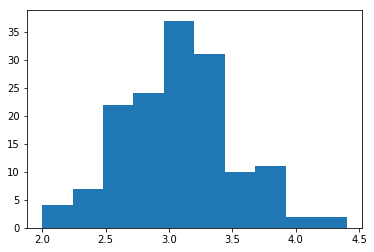

In [235]:
plt.hist(iris["sepal_width"])

(array([ 1.,  3.,  4.,  3.,  8., 14., 14., 10., 26., 11., 19., 12.,  6.,
         4.,  9.,  2.,  1.,  1.,  1.,  1.]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <a list of 20 Patch objects>)

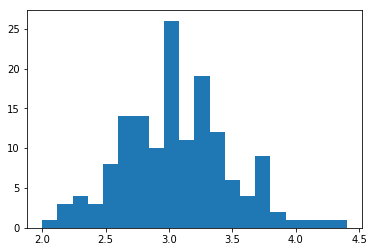

In [237]:
plt.hist(iris["sepal_width"], bins=20)

(array([0.05555556, 0.16666667, 0.22222222, 0.16666667, 0.44444444,
        0.77777778, 0.77777778, 0.55555556, 1.44444444, 0.61111111,
        1.05555556, 0.66666667, 0.33333333, 0.22222222, 0.5       ,
        0.11111111, 0.05555556, 0.05555556, 0.05555556, 0.05555556]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <a list of 20 Patch objects>)

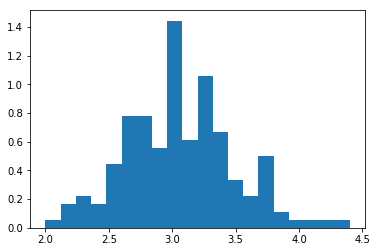

In [238]:
plt.hist(iris["sepal_width"], bins=20, density=True)    # density는 y축을 밀도로 주는 것(?)

(array([0.05555556, 0.16666667, 0.22222222, 0.16666667, 0.44444444,
        0.77777778, 0.77777778, 0.55555556, 1.44444444, 0.61111111,
        1.05555556, 0.66666667, 0.33333333, 0.22222222, 0.5       ,
        0.11111111, 0.05555556, 0.05555556, 0.05555556, 0.05555556]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <a list of 20 Patch objects>)

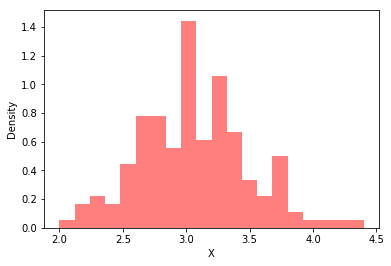

In [242]:
plt.xlabel("X")
plt.ylabel("Density")
plt.hist(iris["sepal_width"], bins=20, density=True, facecolor="red", alpha=0.5)    # alpha = 투명도

(array([0.05555556, 0.16666667, 0.22222222, 0.16666667, 0.44444444,
        0.77777778, 0.77777778, 0.55555556, 1.44444444, 0.61111111,
        1.05555556, 0.66666667, 0.33333333, 0.22222222, 0.5       ,
        0.11111111, 0.05555556, 0.05555556, 0.05555556, 0.05555556]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <a list of 20 Patch objects>)

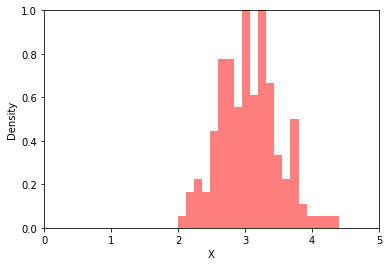

In [243]:
plt.xlabel("X")
plt.ylabel("Density")
plt.axis([0, 5, 0, 1])
plt.hist(iris["sepal_width"], bins=20, density=True, facecolor="red", alpha=0.5)    # alpha = 투명도

seaborn

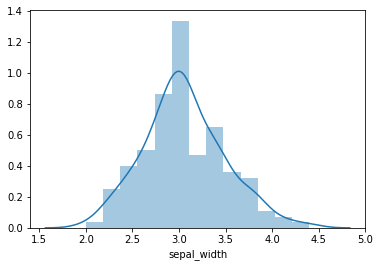

In [244]:
sns.distplot(iris["sepal_width"])

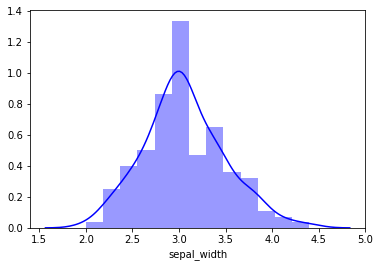

In [245]:
sns.distplot(iris["sepal_width"], color="blue")

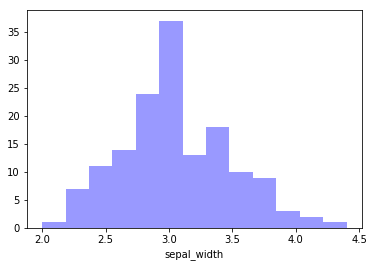

In [246]:
sns.distplot(iris["sepal_width"], color="blue", kde=False)    # kde: 추이선 그리냐 마냐

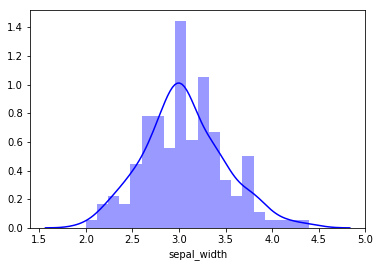

In [247]:
sns.distplot(iris["sepal_width"], color="blue", bins=20)